In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("PSID.txt", sep = "\t") #import data into Pandas data frame

In [2]:
df.head()

,ER60001,ER60002,ER60017,ER60018,ER60167,ER62366,ER62506,ER64612,ER64810,ER65349,ER65459
0,1,8474,57,2,5,4,0,5,1,60704,11
1,1,1428,41,2,5,3,0,5,1,45084,12
2,1,4738,39,1,0,2,0,1,1,52000,10
3,1,6780,38,1,0,4,0,5,1,35000,13
4,1,7304,34,1,5,4,0,1,1,31560,11


In [3]:
df.describe()

,ER60001,ER60002,ER60017,ER60018,ER60167,ER62366,ER62506,ER64612,ER64810,ER65349,ER65459
count,9048.0,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9.048000e+03,9048.000000
mean,1.0,4534.549072,45.654730,1.329244,1.408378,2.554377,0.264920,4.106764,1.692418,6.954035e+04,14.570955
std,0.0,2620.837601,16.528586,0.469965,2.241426,1.086979,0.889743,1.701723,1.316793,9.456179e+04,10.308990
min,1.0,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-2.200000e+04,0.000000
25%,1.0,2263.750000,32.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,2.400000e+04,12.000000
50%,1.0,4531.500000,43.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,4.931250e+04,13.000000
75%,1.0,6803.250000,58.000000,2.000000,5.000000,3.000000,0.000000,5.000000,2.000000,9.021125e+04,16.000000
max,1.0,9080.000000,102.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.250100e+06,99.000000


In [4]:
#rename columns
df.rename(columns = {"ER60001" : "Release_Number"}, inplace = True)
df.rename(columns = {"ER60002" : "ID_Number"}, inplace = True)
df.rename(columns = {"ER60017" : "Age_of_Head"}, inplace = True)
df.rename(columns = {"ER60018" : "head_is_female"}, inplace = True)
df.rename(columns = {"ER60167" : "Work_for_Money"}, inplace = True)
df.rename(columns = {"ER62366" : "Health_Head"}, inplace = True)
df.rename(columns = {"ER62506" : "Health_Child"}, inplace = True)
df.rename(columns = {"ER64612" : "Insurance"}, inplace = True)
df.rename(columns = {"ER64810" : "Race"}, inplace = True)
df.rename(columns = {"ER65349" : "Income"}, inplace = True)
df.rename(columns = {"ER65459" : "Education"}, inplace = True)

df.head()

,Release_Number,ID_Number,Age_of_Head,head_is_female,Work_for_Money,Health_Head,Health_Child,Insurance,Race,Income,Education
0,1,8474,57,2,5,4,0,5,1,60704,11
1,1,1428,41,2,5,3,0,5,1,45084,12
2,1,4738,39,1,0,2,0,1,1,52000,10
3,1,6780,38,1,0,4,0,5,1,35000,13
4,1,7304,34,1,5,4,0,1,1,31560,11


In [5]:
df.isnull().values.any() #check for empty values

False

In [6]:
df.Insurance.unique()

array([5, 1, 8, 9])

In [7]:
#clean up income & take its log
import math

#clean up income
df.drop( df[df.Income < 0].index, inplace = True)

df["Income"] = df["Income"].apply(lambda x: math.log(x+1)) #take log
df.describe()

,Release_Number,ID_Number,Age_of_Head,head_is_female,Work_for_Money,Health_Head,Health_Child,Insurance,Race,Income,Education
count,9047.0,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000
mean,1.0,4534.365536,45.657124,1.329280,1.408533,2.554548,0.264839,4.106665,1.692495,10.552224,14.570797
std,0.0,2620.924308,16.527931,0.469978,2.241501,1.086916,0.889758,1.701791,1.316846,1.650250,10.309549
min,1.0,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.0,2263.500000,32.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,10.085872,12.000000
50%,1.0,4531.000000,43.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,10.806207,13.000000
75%,1.0,6803.500000,58.000000,2.000000,5.000000,3.000000,0.000000,5.000000,2.000000,11.410045,16.000000
max,1.0,9080.000000,102.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,15.473758,99.000000


In [8]:
#drop Work for Money
del df["Work_for_Money"]

# remove "refused", "inappropriate", & unknown observations from data

#clean up Age of Head
df.drop( df[df.Age_of_Head == 999].index, inplace = True)

#clean up Health Status of Head
df.drop( df[(df.Health_Head == 8)].index, inplace = True)
df.drop( df[(df.Health_Head == 9)].index, inplace = True)

#clean up Health Status of Head While Child Was Younger than 17
df.drop( df[(df.Health_Child == 8)].index, inplace = True) 
df.drop( df[(df.Health_Child == 9)].index, inplace = True) 
df.drop( df[(df.Health_Child == 0)].index, inplace = True) 

#clean up health insurance at any time in 2013 or 2014
df.drop( df[(df.Insurance == 9)].index, inplace = True)
df.drop( df[(df.Insurance == 8)].index, inplace = True)
            
#clean up race of head
df.drop( df[df.Race == 9].index, inplace = True)

#clean up education level
df.drop( df[df.Education == 99].index, inplace = True)

df.Insurance.describe()

count    1045.000000
mean        3.809569
std         1.829700
min         1.000000
25%         1.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Insurance, dtype: float64

In [9]:
# recode head_is_female
# 0 for male
# 1 for female

df.head_is_female = df.head_is_female.apply(lambda x: x-1)
df.head_is_female.head()

9     0
11    0
12    0
32    1
70    0
Name: head_is_female, dtype: int64

In [10]:
# recode race
# 1 is white
# 2 is black
# 3 is other

df.Race = df.Race.replace(7,3)
df.Race = df.Race.replace(5,3)
df.Race = df.Race.replace(4,3)

# recode child health & head health
# 1 is very good
# 2 is good and fair
# 3 is fair and poor

df.Health_Head = df.Health_Head.replace(3,2)
df.Health_Head = df.Health_Head.replace(4,3)
df.Health_Head = df.Health_Head.replace(5,3)

df.Health_Child = df.Health_Child.replace(3,2)
df.Health_Child = df.Health_Child.replace(4,3)
df.Health_Child = df.Health_Child.replace(5,3)

In [11]:
# recode Insurance
# 0 is no health insurance in 2013 or 2014
# 1 is health insurance in 2013 or 2014

df.Insurance = df.Insurance.replace(5,0)
df.Insurance.describe() #mean of cleaned up Insurance variable is .2976

count    1045.000000
mean        0.297608
std         0.457425
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Insurance, dtype: float64

In [12]:
df = pd.get_dummies(df, columns = ["Health_Head","Health_Child","Race"], drop_first = True)
df.head()

,Release_Number,ID_Number,Age_of_Head,head_is_female,Insurance,Income,Education,Health_Head_2,Health_Head_3,Health_Child_2,Health_Child_3,Race_2,Race_3
9,1,7098,20,0,0,11.818209,12,1,0,1,0,0,0
11,1,2571,37,0,0,11.390995,12,1,0,1,0,0,0
12,1,987,64,0,0,9.923045,9,0,1,0,1,0,0
32,1,3856,22,1,0,7.804251,12,0,1,0,1,0,0
70,1,5223,19,0,0,12.238061,12,0,0,0,0,0,0


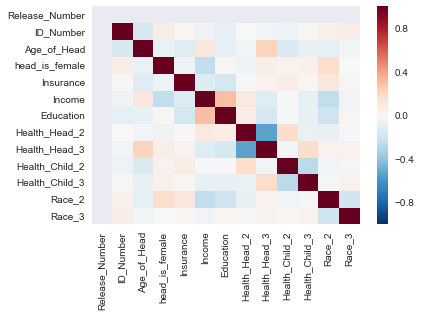

In [13]:
import seaborn as sb
%matplotlib inline

sb.heatmap(df.corr())

In [14]:
#save a copy of df
df_reg = df
target = pd.DataFrame( df [["Insurance"]] ) #target variable
df_reg = pd.DataFrame( df [["Age_of_Head", "head_is_female","Income","Education","Health_Head_2","Health_Head_3","Health_Child_2","Health_Child_3","Race_2","Race_3"]])

#rename dummy variables
df_reg.rename(columns = {"Health_Child_2" : "Child_Good_Fair_Health"}, inplace = True)
df_reg.rename(columns = {"Health_Child_3" : "Child_Poor Health"}, inplace = True)
df_reg.rename(columns = {"Health_Head_2" : "Head_Good_Fair_Health"}, inplace = True)
df_reg.rename(columns = {"Health_Head_3" : "Head_Poor Health"}, inplace = True)
df_reg.rename(columns = {"Race_2" : "Black"}, inplace = True)
df_reg.rename(columns = {"Race_3" : "Other_Race"}, inplace = True)

df_reg.describe()

,Age_of_Head,head_is_female,Income,Education,Head_Good_Fair_Health,Head_Poor Health,Child_Good_Fair_Health,Child_Poor Health,Black,Other_Race
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,33.588517,0.285167,10.318892,13.321531,0.628708,0.144498,0.482297,0.070813,0.410526,0.052632
std,14.727833,0.451710,1.523841,2.259498,0.483382,0.351762,0.499926,0.256636,0.492165,0.223404
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,9.892224,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,10.551140,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,11.113954,16.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,1.000000,13.191617,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
import statsmodels.api as sm

#logit regress
df_reg = sm.add_constant(df_reg)
model = sm.Logit(target,df_reg)
results = model.fit()
print(results.summary())

/Users/Turmunkh/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.570718
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Insurance   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1034
Method:                           MLE   Df Model:                           10
Date:                Tue, 14 Nov 2017   Pseudo R-squ.:                 0.06259
Time:                        22:53:00   Log-Likelihood:                -596.40
converged:                       True   LL-Null:                       -636.22
                                        LLR p-value:                 5.906e-13
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5766      0.658      3.918      0.000       1.288      

The Logit model we used estimates the probability that someone in a household not having health insurance in the years 2013-2014 as the cumulative standard logistic distribution function. Estimation is done by maximum likelihood. We use the following explanatory variables: sex, race, age, employment, adult health status, childhood health status, income, and education. 

From the regression results, we see that the intercept, age, sex, education, and being black as opposed to white are statistically significant at a significance level of 5%. 

Based on this data, there is not a statistically significant effect of childhood health status on being without health insurance at the 5% significance level. 

Let's visualize how gender affects the likelihood of not having insurance while changing income and controlling for the other factors. 

In [16]:
#Model: Pr (Y = 1 | X1, ... , Xk) = 1 / (1 + e ^ (- (B0 + B1*X1 + .. Bk*Xk)))

gender_df = pd.DataFrame()

#populate the gender dataframe with a range of income
newList = []
for x in range(0,160,1):
    y = x/10
    newList.append(y)
gender_df = pd.DataFrame(newList, columns=["Income"])
# gender_df.head()

#Find the probabilities of a white man who has the mean age, education and has excellent child + head health
male = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*df.Age_of_Head.mean()) + #avg age * coef
                      float(results.params.values[4]*float(x)) + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() #avg educ * coef
                           ))))
    male.append(value)

#add male series to gender_df
gender_df["Male"] = pd.DataFrame(male, columns = ["Male"])

#Find the probabilities of a white woman who has the mean age, education and has excellent child + head health
female = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*df.Age_of_Head.mean()) + #avg age * coef
                      float(results.params.values[2]*1) + #coefficient for female
                      float(results.params.values[4]*float(x)) + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() #avg educ * coef
                           ))))
    female.append(value)

#add female series to gender_df    
gender_df["Female"] = pd.DataFrame(female, columns = ["Female"])

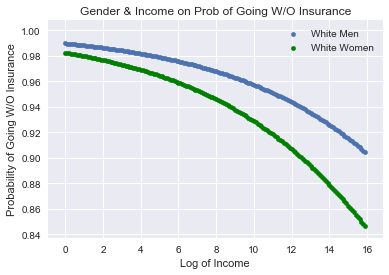

In [17]:
import matplotlib.pyplot as plt

# plot cumulative logistic distribution function
# gender_df.plot(x="Income",y=["Male","Female"],kind="scatter")
ax = gender_df.plot(x="Income",y=["Male"],kind="scatter",label="White Men",title="Gender & Income on Prob of Going W/O Insurance")
gender_df.plot(x="Income",y=["Female"], ax=ax,kind="scatter",label="White Women", color="Green")
ax.set_ylabel("Probability of Going W/O Insurance")
ax.set_xlabel("Log of Income")
plt.show()



As we see, white women are less likely go without health than white men with 
the same average education and excellent child + head health levels at all income levels.
i.e., Women are more likely to have health insurance than men. 

Perhaps this is because women are more likely to go to the doctor more often and
thus benefit from health insurance more. For example, during pregnancies, women may bear
more of its associated costs than men. 

Another explanation could be that men are more likely to be overconfident and underestimate
the probability of potential health issues (even though they die at higher rates than women).

What's also interesting is men and women's rates of going without insurance seem to diverge
as income increases. A possible explanation for this is that women may prioritize health insurance more than men do and they buy it when they have high enough incomes whereas men may prioritize other goods & services first. 

We also notice that as income rises for both genders, they will be more likely to have
health insurance. This is expected, because wealthier people will be able to afford health insurance more.

In [18]:
gender_df.describe()


,Income,Male,Female
count,160.000000,160.000000,160.000000
mean,7.950000,0.961159,0.935662
std,4.633213,0.024167,0.038892
min,0.000000,0.904511,0.846317
25%,3.975000,0.944252,0.907809
50%,7.950000,0.968038,0.946259
75%,11.925000,0.981870,0.969217
max,15.900000,0.989780,0.982549


Let's see how age plays a role between men of white, black, and other races.  

In [19]:
#Model: Pr (Y = 1 | X1, ... , Xk) = 1 / (1 + e ^ (- (B0 + B1*X1 + .. Bk*Xk)))

race_df = pd.DataFrame()

#populate the race dataframe with a range of ages
newList = []
for x in df.Age_of_Head:
    newList.append(x)
race_df = pd.DataFrame(newList, columns=["Age"])

#Find the probabilities of a white man who has the mean education + income levels, and has excellent child + head health
white = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*x) + #avg age * coef
                      float(results.params.values[4]*df.Income.mean() + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() #avg educ * coef
                           )))))
    white.append(value)

#add white male series to race_df
race_df["White"] = pd.DataFrame(white, columns = ["White"])

#Find the probabilities of a black man who has the mean education + income levels, and has excellent child + head health
black = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*x) + #avg age * coef
                      float(results.params.values[4]*df.Income.mean() + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() + #avg educ * coef
                      float(results.params.values[9]*1)
                           )))))
    black.append(value)

#add black male series to race_df
race_df["Black"] = pd.DataFrame(black, columns = ["Black"])
                 
#Find the probabilities of a Other race man who has the mean education + income levels, and has excellent child + head health
other = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*x) + #avg age * coef
                      float(results.params.values[4]*df.Income.mean() + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() + #avg educ * coef
                      float(results.params.values[10]*1)
                           )))))
    other.append(value)

#add Other male series to race_df
race_df["Other"] = pd.DataFrame(other, columns = ["Other"])

In [20]:
race_df.head()

,Age,White,Black,Other
0,20,0.967356,0.977360,0.974525
1,37,0.951797,0.966402,0.962249
2,64,0.911985,0.937866,0.930439
3,22,0.965814,0.976278,0.973312
4,19,0.968102,0.977882,0.975111


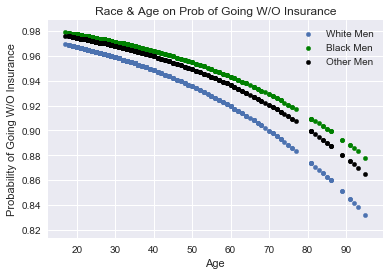

In [21]:
# plot cumulative logistic distribution function
ax = race_df.plot(x="Age",y=["White"],kind="scatter",label="White Men",title="Race & Age on Prob of Going W/O Insurance")
race_df.plot(x="Age",y=["Black"], ax=ax,kind="scatter",label="Black Men", color="Green")
race_df.plot(x="Age",y=["Other"], ax=ax,kind="scatter",label="Other Men", color="Black")
ax.set_ylabel("Probability of Going W/O Insurance")
ax.set_xlabel("Age")
plt.show()

We see that all men are more likely to have health insurance as they grow older while controlling for other variables. White men are more likely to have health insurance, followed by Other men, followed closely by black men. One (possibly false) explanation could be because black and Other men might have higher burdens such as more children or more siblings to take care of, and they don't have the ability to pay for insurance as readily as white men. 

Let's visualize what effects different childhood health statuses have on the probability of having health insurance as an adult.

In [22]:
#Model: Pr (Y = 1 | X1, ... , Xk) = 1 / (1 + e ^ (- (B0 + B1*X1 + .. Bk*Xk)))

health_df = pd.DataFrame()

#populate the gender dataframe with a range of income
newList = []
for x in range(0,160,1):
    y = x/10
    newList.append(y)
health_df = pd.DataFrame(newList, columns=["Income"])

#Find the probabilities of a white man who has the mean age, education and has excellent child health + excellent head health
excellent = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*df.Age_of_Head.mean()) + #avg age * coef
                      float(results.params.values[4]*float(x)) + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() #avg educ * coef
                           ))))
    excellent.append(value)

#add excellent series to health_df
health_df["Excellent"] = pd.DataFrame(excellent, columns = ["Excellent"])

#Find the probabilities of a white woman who has the mean age, education and has good child health + excellent head health
good = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*df.Age_of_Head.mean()) + #avg age * coef
                      float(results.params.values[7]*1) + #coefficient for good child health
                      float(results.params.values[4]*float(x)) + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() #avg educ * coef
                           ))))
    good.append(value)

#add good series to health_df    
health_df["Good"] = pd.DataFrame(good, columns = ["Good"])

#Find the probabilities of a white woman who has the mean age, education and has excellent child health + excellent head health
poor = []
for x in newList:
    value = 1 / (1 + math.exp(-(float(results.params.values[0]) + #intercept
                      float(results.params.values[1]*df.Age_of_Head.mean()) + #avg age * coef
                      float(results.params.values[8]*1) + #coefficient for poor child health
                      float(results.params.values[4]*float(x)) + #avg income * coef
                      float(results.params.values[5]*df.Education.mean() #avg educ * coef
                           ))))
    poor.append(value)

#add female series to gender_df    
health_df["Poor"] = pd.DataFrame(poor, columns = ["Poor"])

In [23]:
health_df.head()

,Income,Excellent,Good,Poor
0,0.0,0.989780,0.991966,0.989803
1,0.1,0.989631,0.991848,0.989654
2,0.2,0.989480,0.991729,0.989504
3,0.3,0.989326,0.991609,0.989351
4,0.4,0.989171,0.991486,0.989196


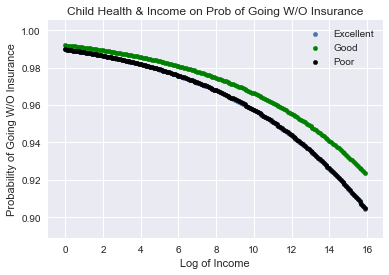

In [24]:
# plot cumulative logistic distribution function
ax = health_df.plot(x="Income",y=["Excellent"],kind="scatter",label="Excellent",title="Child Health & Income on Prob of Going W/O Insurance")
health_df.plot(x="Income",y=["Good"], ax=ax,kind="scatter",label="Good", color="Green")
health_df.plot(x="Income",y=["Poor"], ax=ax,kind="scatter",label="Poor", color="Black")
ax.set_ylabel("Probability of Going W/O Insurance")
ax.set_xlabel("Log of Income")
plt.show()

We see that the Excellent variable very closely matches the Poor variable, which intuitively doesn't make sense. We also see that people who had good health as a child are less likely to have insurance at all income levels, which also doesn't make sense. 

However, since these variables aren't statistically significant, these results are suspect. 